## Practical Exercise Elastix

In [1]:
# Library imports
import matplotlib.pyplot as plt
import imageio.v3 as iio
import SimpleITK as sitk
import elastix
import os

# General file paths
BASE_PATH_MR = "ImagesforPractical/MR"
BASE_PATH_XRAY = "ImagesforPractical/chest_xrays"
ELASTIX_PATH = os.path.join(r'C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/transformix.exe')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

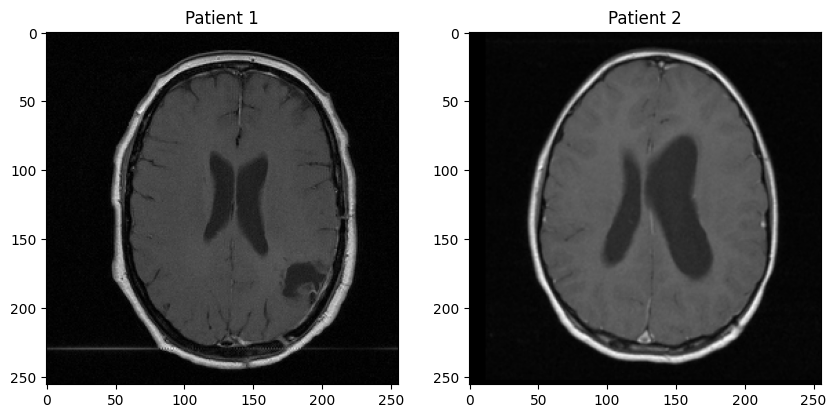

In [2]:
# Load data
MR_patient1_path = os.path.join(BASE_PATH_MR, "patient1.jpg")
MR_patient2_path = os.path.join(BASE_PATH_MR, "patient2.jpg")
im_patient1 = iio.imread(MR_patient1_path)[:, :, 0]
im_patient2 = iio.imread(MR_patient2_path)[:, :, 0]

# Plot MR data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im_patient1, cmap="gray")
ax[0].set_title("Patient 1")
ax[1].imshow(im_patient2, cmap="gray")
ax[1].set_title("Patient 2");

## Sampling
To understand the registration process, it is sometimes useful to study the search space. This can be done by using the optimizer FullSearch, setting a number of values for one of the transformation parameters and evaluating the cost function for those values. In the current setting, it evaluates parameter 0 (rotation around z-axis) from -1.5 to 1.5 in steps of 0.01.

One way of speeding up the registration process is by subsampling, i.e. by not using all voxels in the images to compute the cost function, but a subset. You can use various ways of subsampling by setting the parameter (ImageSampler) differently. The equidistant subsampling can be specified as `Full`, `Grid` or `Random`.

C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/MR\patient1.jpg -m ImagesforPractical/MR\patient2.jpg -p ImagesforPractical/MR\parameters_samplespace_MR_full.txt -out ImagesforPractical/MR\results_samplespace
C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/MR\patient1.jpg -m ImagesforPractical/MR\patient2.jpg -p ImagesforPractical/MR\parameters_samplespace_MR_grid.txt -out ImagesforPractical/MR\results_samplespace
C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/MR\patient1.jpg -m ImagesforPractical/MR\patient2.jpg -p ImagesforPractical/MR\parameters_samplespace_MR_random.txt -out ImagesforPractical/MR\results_samplespace


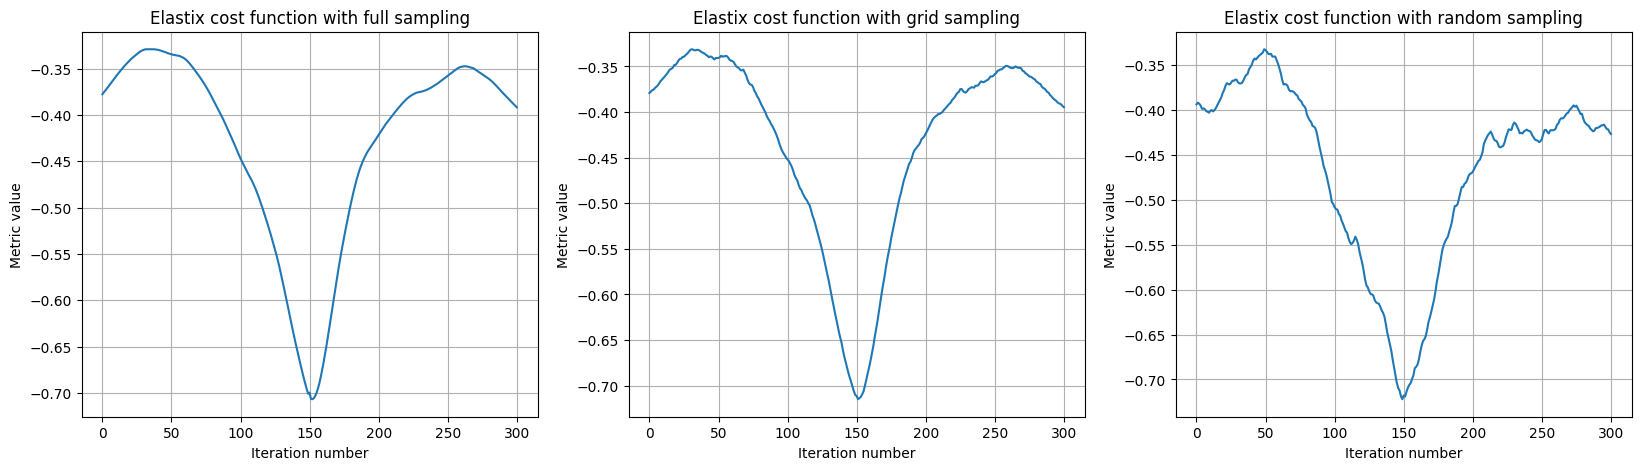

In [3]:
# Multiple parameter files to clearly see differences
param_paths = [
    os.path.join(BASE_PATH_MR, "parameters_samplespace_MR_full.txt"),
    os.path.join(BASE_PATH_MR, "parameters_samplespace_MR_grid.txt"),
    os.path.join(BASE_PATH_MR, "parameters_samplespace_MR_random.txt")
]

# Make a results directory if non exists
if os.path.exists(os.path.join(BASE_PATH_MR, 'results_samplespace')) is False:
    os.mkdir(os.path.join(BASE_PATH_MR, 'results_samplespace'))

# Define the paths to the two images you want to register
fixed_image_path = MR_patient1_path
moving_image_path = MR_patient2_path

# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for idx in range(len(param_paths)):
    # Execute the registration. Make sure the paths below are correct
    el.register(
        fixed_image=fixed_image_path,
        moving_image=moving_image_path,
        parameters=[param_paths[idx]],
        output_dir=os.path.join(BASE_PATH_MR, 'results_samplespace')
    )

    # Find the iteration results
    iteration_file_path = os.path.join(BASE_PATH_MR, 'results_samplespace', 'IterationInfo.0.R0.txt')
    log = elastix.logfile(iteration_file_path)

    # Plot cost function
    ax[idx].plot(log["itnr"], log["metric"])
    ax[idx].set_title(f"Elastix cost function with {param_paths[idx].split("_")[-1][:-4]} sampling")
    ax[idx].set_xlabel("Iteration number")
    ax[idx].set_ylabel("Metric value")
    ax[idx].grid();

## B-spline grid spacing
In this exercise, patient1 (fixed) and patient2 (moving) are registered five times, using B-spline spacings 64, 32, 16, 8 and 4. View the images and look at the differences in the results (the result image is in results directory, in tiff format).

C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/MR\patient1.jpg -m ImagesforPractical/MR\patient2.jpg -p ImagesforPractical/MR\parameters_bspline_MR.txt -out ImagesforPractical/MR\results_bsplinespacing
C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/MR\patient1.jpg -m ImagesforPractical/MR\patient2.jpg -p ImagesforPractical/MR\parameters_bspline_MR.txt -out ImagesforPractical/MR\results_bsplinespacing
C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/MR\patient1.jpg -m ImagesforPractical/MR\patient2.jpg -p ImagesforPractical/MR\parameters_bspline_MR.txt -out ImagesforPractical/MR\results_bsplinespacing
C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win

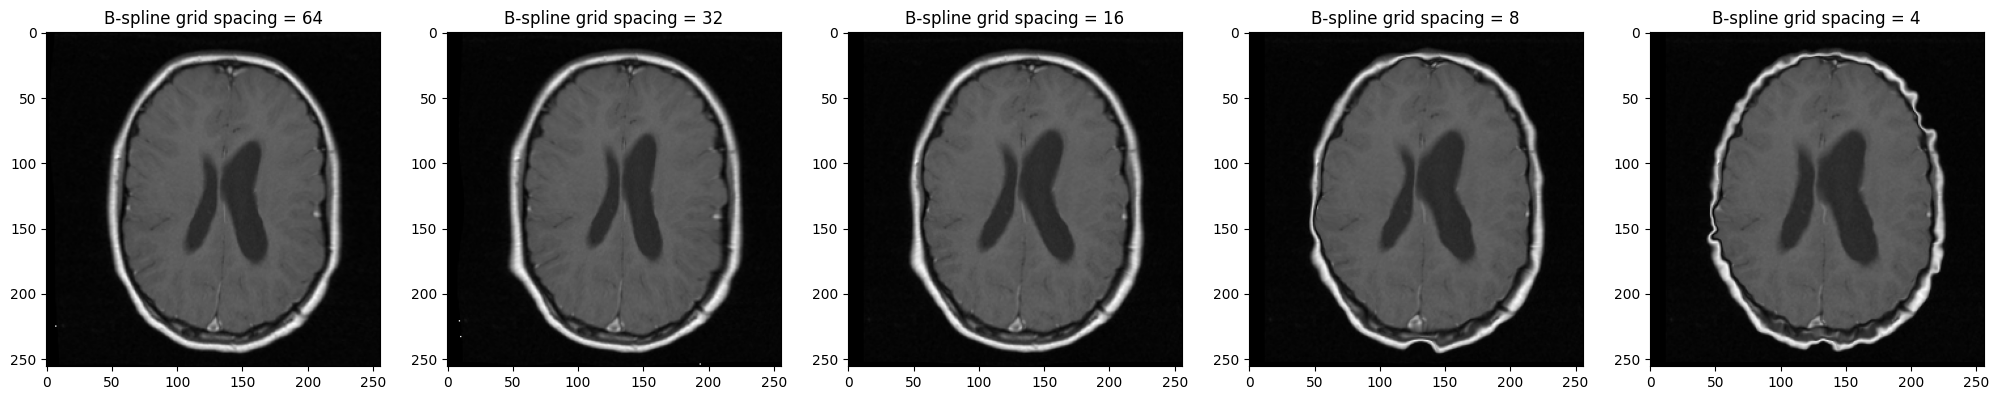

In [4]:
spacings = [64, 32, 16, 8, 4]

# Make a results directory if non exists
if os.path.exists(os.path.join(BASE_PATH_MR, 'results_bsplinespacing')) is False:
    os.mkdir(os.path.join(BASE_PATH_MR, 'results_bsplinespacing'))

fig, ax = plt.subplots(1, len(spacings), figsize=(5*len(spacings), 5))
for idx in range(len(spacings)):
    # Open parameter text file
    infile = open(os.path.join(BASE_PATH_MR, "parameters_bspline_MR.txt"))
    all_lines = infile.readlines()
    infile.close()
    
    # Change the spacing of the b-spline grid
    all_lines[26] = f"(FinalGridSpacingInPhysicalUnits {spacings[idx]})\n"

    # Write changes to new text file
    outfile = open(os.path.join(BASE_PATH_MR, "parameters_bspline_MR.txt"), 'w')
    for idx_line in range(len(all_lines)):
        outfile.write(all_lines[idx_line])
    outfile.close()

    # Execute the registration. Make sure the paths below are correct
    el.register(
        fixed_image=fixed_image_path,
        moving_image=moving_image_path,
        parameters=[os.path.join(BASE_PATH_MR, "parameters_bspline_MR.txt")],
        output_dir=os.path.join(BASE_PATH_MR, 'results_bsplinespacing')
    )

    # Find the resulting image
    result_path = os.path.join(BASE_PATH_MR, 'results_bsplinespacing', 'result.0.tiff')
    transformed_moving_image = iio.imread(result_path)

    # Show the resulting images side by side
    ax[idx].imshow(transformed_moving_image, cmap='gray')
    ax[idx].set_title(f"B-spline grid spacing = {spacings[idx]}");

## Multi-resolution registration
This file is set to perform a multi-resolution registration. The parameter `FinalGridSpacingInPhysicalUnits` indicates the Bspline spacing at 3 the finest resolution. You can set the spacing manually for the coarser resolutions, but by default the spacing is **increased by a factor of 2** at each coarser resolution (as is the case in this file). Total number of resolutions used is 5 and so the Bspline spacing at the coarsest resolution is 3*2^4 = 48.

C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/MR\patient1.jpg -m ImagesforPractical/MR\patient2.jpg -p ImagesforPractical/MR\parameters_bspline_multires_MR.txt -out ImagesforPractical/MR\results_multires
C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/MR\patient1.jpg -m ImagesforPractical/MR\patient2.jpg -p ImagesforPractical/MR\parameters_samplespace2_MR.txt -out ImagesforPractical/MR\results_samplespace2


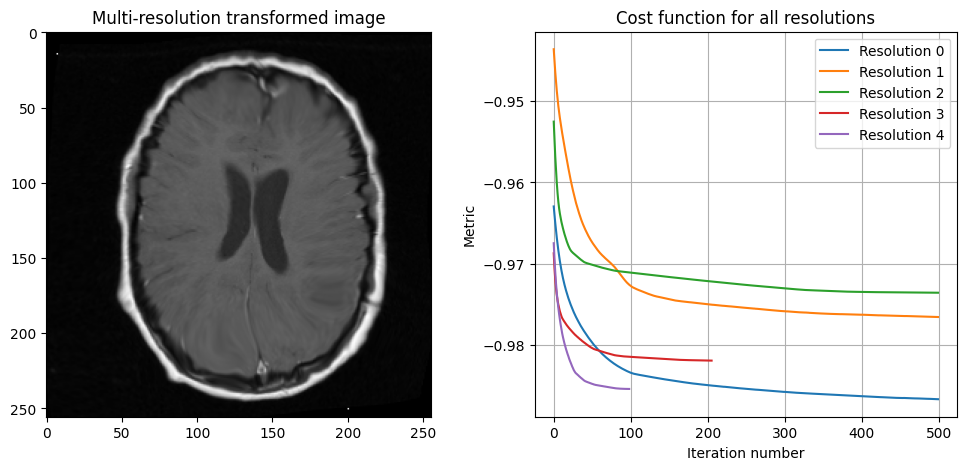

In [5]:
# Make a results directory if non exists
if os.path.exists(os.path.join(BASE_PATH_MR, 'results_multires')) is False:
    os.mkdir(os.path.join(BASE_PATH_MR, 'results_multires'))
if os.path.exists(os.path.join(BASE_PATH_MR, 'results_samplespace2')) is False:
    os.mkdir(os.path.join(BASE_PATH_MR, 'results_samplespace2'))

# Execute the registration. Make sure the paths below are correct
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(BASE_PATH_MR, "parameters_bspline_multires_MR.txt")],
    output_dir=os.path.join(BASE_PATH_MR, 'results_multires')
)
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(BASE_PATH_MR, "parameters_samplespace2_MR.txt")],
    output_dir=os.path.join(BASE_PATH_MR, 'results_samplespace2')
)

# Find the results
result_path = os.path.join(BASE_PATH_MR, 'results_multires', 'result.0.tiff')
transformed_moving_image = iio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(transformed_moving_image, cmap='gray')
ax[0].set_title(f"Multi-resolution transformed image")

# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join(BASE_PATH_MR, 'results', 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    ax[1].plot(log['itnr'], log['metric'])

# Plot settings
ax[1].set_title("Cost function for all resolutions")
ax[1].set_xlabel("Iteration number")
ax[1].set_ylabel("Metric")
ax[1].legend(['Resolution {}'.format(i) for i in range(5)])
ax[1].grid();

## Penalty terms and Jacobian
A deformation modelled with B-splines is often called a free-form deformation, because the Bspline model does not restrict the deformation. The method is free to deform the image in any way (well, almost). The free nature of B-spline modelling can result in very unrealistic deformations, for instance, containing folding of tissue. A way to resolve is this is to include a penalty term in the cost function.

In [6]:
# Load data
fixed_image_path = os.path.join(BASE_PATH_XRAY, "fixed_image.mhd")
itk_fixed_image = sitk.ReadImage(fixed_image_path)
fixed_image = sitk.GetArrayFromImage(itk_fixed_image)

moving_image_path = os.path.join(BASE_PATH_XRAY, "moving_image.mhd")
itk_moving_image = sitk.ReadImage(moving_image_path)
moving_image = sitk.GetArrayFromImage(itk_moving_image)

fp = open(fixed_image_path) 
[print(line) for line in fp]

ObjectType = Image

NDims = 2

BinaryData = True

BinaryDataByteOrderMSB = False

CompressedData = False

TransformMatrix = 1 0 0 1

Offset = 0 0

CenterOfRotation = 0 0

ElementSpacing = 1 1

DimSize = 1024 1024

AnatomicalOrientation = ??

ElementType = MET_DOUBLE

ElementDataFile = fixed_image.raw



[None, None, None, None, None, None, None, None, None, None, None, None, None]

First, we register the fixed and moving chest x-ray images using parameters.txt. View the resulting image. It should give you the impression of a radiologist high on crack.

C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/chest_xrays\fixed_image.mhd -m ImagesforPractical/chest_xrays\moving_image.mhd -p ImagesforPractical/chest_xrays\parameters.txt -out ImagesforPractical/chest_xrays\results


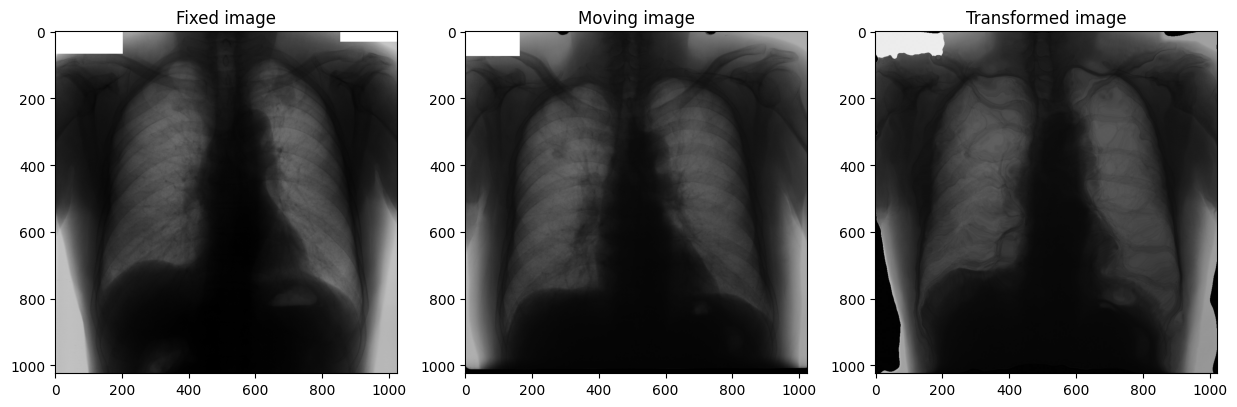

In [7]:
# Make a results directory if non exists
if os.path.exists(os.path.join(BASE_PATH_XRAY, 'results')) is False:
    os.mkdir(os.path.join(BASE_PATH_XRAY, 'results'))

# Execute the registration. Make sure the paths below are correct
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(BASE_PATH_XRAY, "parameters.txt")],
    output_dir=os.path.join(BASE_PATH_XRAY, 'results')
)

# Find result
result_path = os.path.join(BASE_PATH_XRAY, 'results', 'result.0.mhd')
itk_transformed_image = sitk.ReadImage(result_path)
transformed_image = sitk.GetArrayFromImage(itk_transformed_image)

# Plot the result
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_image, cmap='gray')
ax[2].set_title('Transformed image');

The Jacobian determinant of the deformation field gives an indication of local deformation. It can also show erratic deformations like folding. These correspond to negative values. In order to compute the Jacobian determinant of an elastix deformation field, you need to use the `TransformixInterface class` and use the correct path for the input parameters. 

Compute the Jacobian determinant of the deformation field using jacobian_determinant. View the outcome from results/spatialJacobian.mhd (it could also be in .tiff or .dcm format depending on your OS). Then binarize it using level 0 (out = determinant>0) and visualize it.

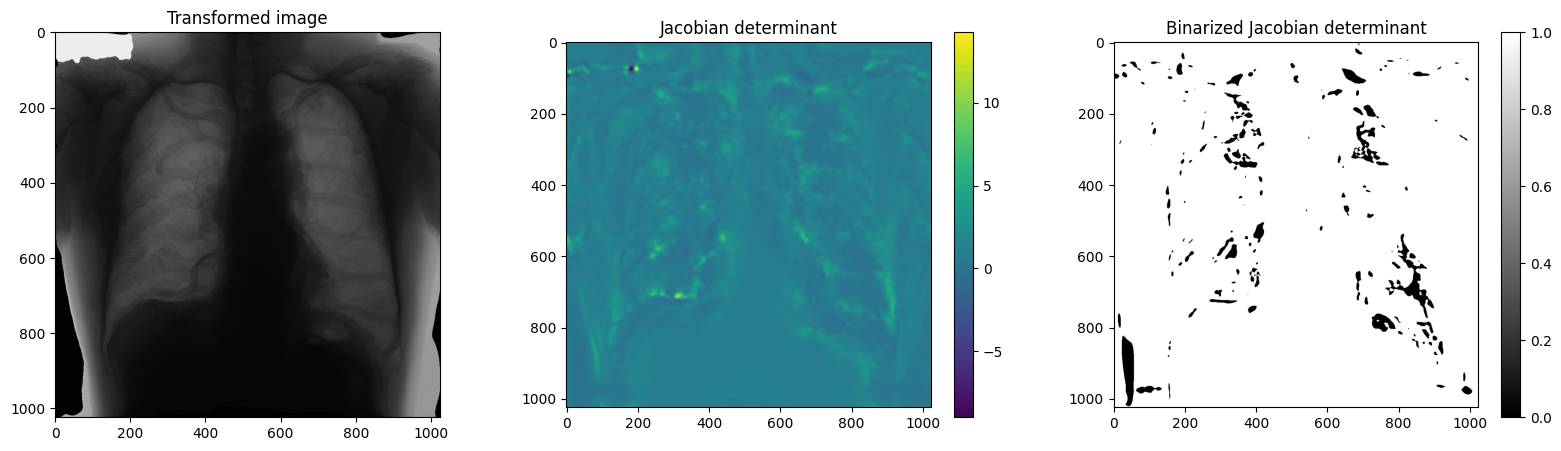

In [8]:
# Make a new transformix object tr with the CORRECT PATH to transformix
transform_path = os.path.join(BASE_PATH_XRAY, 'results', 'TransformParameters.0.txt')
tr = elastix.TransformixInterface(parameters=transform_path, transformix_path=TRANSFORMIX_PATH)

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=os.path.join(BASE_PATH_XRAY, 'results'))
itk_jacobian_determinant = sitk.ReadImage(jacobian_determinant_path)
jacobian_determinant = sitk.GetArrayFromImage(itk_jacobian_determinant)

# Plot Jacobian determinant
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(transformed_image, cmap='gray')
ax[0].set_title('Transformed image')

im1 = ax[1].imshow(jacobian_determinant)
ax[1].set_title('Jacobian determinant')
fig.colorbar(im1, ax=ax[1])

im2 = ax[2].imshow(jacobian_determinant > 0, cmap='gray')
ax[2].set_title('Binarized Jacobian determinant')
fig.colorbar(im2, ax=ax[2]);

As said, a penalty term can regularize the resulting deformations. We add a penalty term called `TransformBendingEnergyPenalty`. It penalizes bending, i.e. the second derivative of the deformation. See parameterswithpenalty.txt. The cost function now includes this penalty term and weights to balance the mutual information metric and the penalty term. By varying the weights, you can give more importance to the image metric or to the bending penalizer.

C:/Users/20212077/OneDrive - TU Eindhoven/Desktop/8DM20 - Capita Selecta Medical Imaging/elastix-5.0.0-win64/elastix.exe -f ImagesforPractical/chest_xrays\fixed_image.mhd -m ImagesforPractical/chest_xrays\moving_image.mhd -p ImagesforPractical/chest_xrays\parameterswithpenalty.txt -out ImagesforPractical/chest_xrays\results_penalty


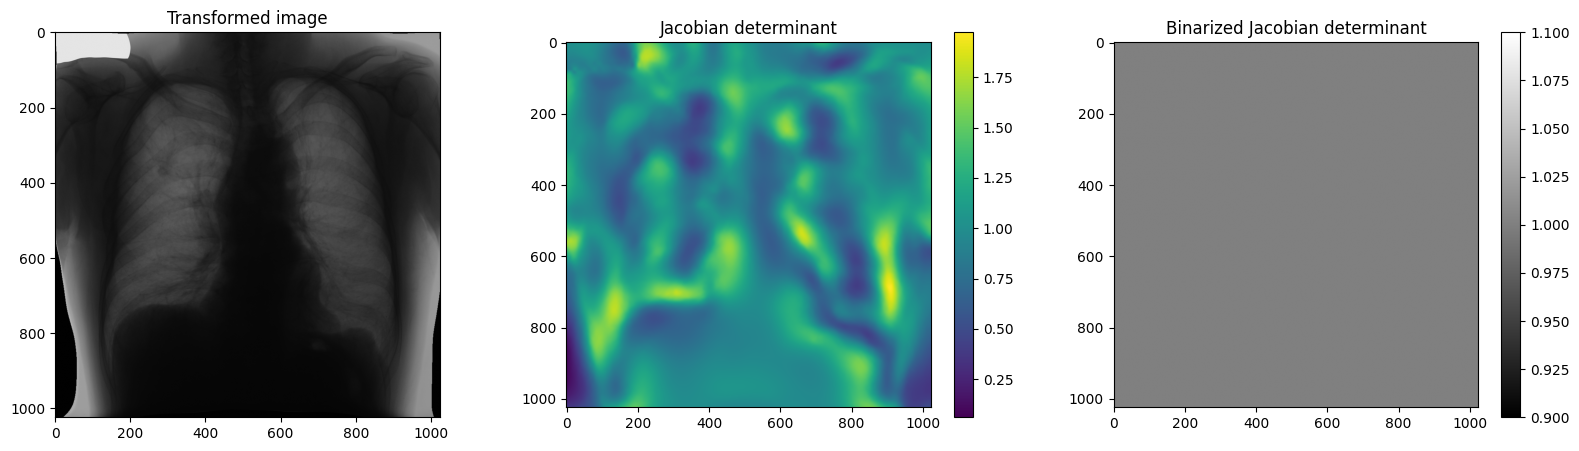

In [9]:
# Make a results directory if non exists
if os.path.exists(os.path.join(BASE_PATH_XRAY, 'results_penalty')) is False:
    os.mkdir(os.path.join(BASE_PATH_XRAY, 'results_penalty'))

# Execute the registration. Make sure the paths below are correct
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(BASE_PATH_XRAY, "parameterswithpenalty.txt")],
    output_dir=os.path.join(BASE_PATH_XRAY, 'results_penalty')
)

# Find result
result_path = os.path.join(BASE_PATH_XRAY, 'results_penalty', 'result.0.mhd')
itk_transformed_image = sitk.ReadImage(result_path)
transformed_image = sitk.GetArrayFromImage(itk_transformed_image)

# Make a new transformix object tr with the CORRECT PATH to transformix
transform_path = os.path.join(BASE_PATH_XRAY, 'results_penalty', 'TransformParameters.0.txt')
tr = elastix.TransformixInterface(parameters=transform_path, transformix_path=TRANSFORMIX_PATH)

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=os.path.join(BASE_PATH_XRAY, 'results_penalty'))
itk_jacobian_determinant = sitk.ReadImage(jacobian_determinant_path)
jacobian_determinant = sitk.GetArrayFromImage(itk_jacobian_determinant)

# Plot the result
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(transformed_image, cmap='gray')
ax[0].set_title('Transformed image')

im1 = ax[1].imshow(jacobian_determinant)
ax[1].set_title('Jacobian determinant')
fig.colorbar(im1, ax=ax[1])

im2 = ax[2].imshow(jacobian_determinant > 0, cmap='gray')
ax[2].set_title('Binarized Jacobian determinant')
fig.colorbar(im2, ax=ax[2]);